In [ ]:
import pandas as pd

# Load the dataset (replace with your actual file path)
df = pd.read_csv('/Users/vishwapatel/Desktop/Marketing Analytics MKTG /Final Project/Online Retail Cleaned-Regular.csv')

# Display the first few rows
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Remove rows with missing values in 'InvoiceNo' or 'Description'
df = df.dropna(subset=['InvoiceNo', 'Description'])

# Remove cancelled transactions (those with InvoiceNo starting with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Group transactions by InvoiceNo and aggregate items into lists
baskets = df.groupby('InvoiceNo')['Description'].apply(list).values.tolist()


In [ ]:
baskets

[['WHITE HANGING HEART T-LIGHT HOLDER',
  'WHITE METAL LANTERN',
  'CREAM CUPID HEARTS COAT HANGER',
  'KNITTED UNION FLAG HOT WATER BOTTLE',
  'RED WOOLLY HOTTIE WHITE HEART.',
  'SET 7 BABUSHKA NESTING BOXES',
  'GLASS STAR FROSTED T-LIGHT HOLDER'],
 ['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT'],
 ['ASSORTED COLOUR BIRD ORNAMENT',
  "POPPY'S PLAYHOUSE BEDROOM ",
  "POPPY'S PLAYHOUSE KITCHEN",
  'FELTCRAFT PRINCESS CHARLOTTE DOLL',
  'IVORY KNITTED MUG COSY ',
  'BOX OF 6 ASSORTED COLOUR TEASPOONS',
  'BOX OF VINTAGE JIGSAW BLOCKS ',
  'BOX OF VINTAGE ALPHABET BLOCKS',
  'HOME BUILDING BLOCK WORD',
  'LOVE BUILDING BLOCK WORD',
  'RECIPE BOX WITH METAL HEART',
  'DOORMAT NEW ENGLAND'],
 ['JAM MAKING SET WITH JARS',
  'RED COAT RACK PARIS FASHION',
  'YELLOW COAT RACK PARIS FASHION',
  'BLUE COAT RACK PARIS FASHION'],
 ['BATH BUILDING BLOCK WORD'],
 ['ALARM CLOCK BAKELIKE PINK',
  'ALARM CLOCK BAKELIKE RED ',
  'ALARM CLOCK BAKELIKE GREEN',
  'PANDA AND BUNNIES STICKER SHEET'

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

# Use TransactionEncoder to one-hot encode the baskets
te = TransactionEncoder()
te_ary = te.fit(baskets).transform(baskets)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Display the first few rows of the encoded data
df_encoded


,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20602,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20603,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20604,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20605,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Takes Long to run

In [ ]:
from mlxtend.frequent_patterns import apriori

# Generate frequent itemsets with a minimum support of 0.01 (1% of transactions)
frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)


In [ ]:
# Display the frequent itemsets
(frequent_itemsets.sort_values(by='support',ascending=False).head(15))

,support,itemsets
260,0.109671,(WHITE HANGING HEART T-LIGHT HOLDER)
100,0.101519,(JUMBO BAG RED RETROSPOT)
193,0.096521,(REGENCY CAKESTAND 3 TIER)
154,0.081817,(PARTY BUNTING)
125,0.075897,(LUNCH BAG RED RETROSPOT)
15,0.070607,(ASSORTED COLOUR BIRD ORNAMENT)
212,0.067210,(SET OF 3 CAKE TINS PANTRY DESIGN )
146,0.064056,(PACK OF 72 RETROSPOT CAKE CASES)
118,0.061775,(LUNCH BAG BLACK SKULL.)
136,0.060610,(NATURAL SLATE HEART CHALKBOARD )


In [ ]:
frequent_itemsets

,support,itemsets
0,0.022711,(3 STRIPEY MICE FELTCRAFT)
1,0.023487,(4 TRADITIONAL SPINNING TOPS)
2,0.046343,(6 RIBBONS RUSTIC CHARM)
3,0.021206,(60 CAKE CASES DOLLY GIRL DESIGN)
4,0.029990,(60 CAKE CASES VINTAGE CHRISTMAS)
...,...,...
347,0.024555,"(WOODLAND CHARLOTTE BAG, RED RETROSPOT CHARLOT..."
348,0.025477,"(REGENCY CAKESTAND 3 TIER, ROSES REGENCY TEACU..."
349,0.026156,"(WOODEN FRAME ANTIQUE WHITE , WOODEN PICTURE F..."
350,0.026302,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY..."


  Support Bin  Itemset Count
0   0.02-0.03            226
1   0.03-0.04             62
2   0.04-0.05             33
3   0.05-0.06             21
4   0.06-0.07              4
5   0.07-0.08              2
6   0.08-0.09              1
7    0.09-0.1              1


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


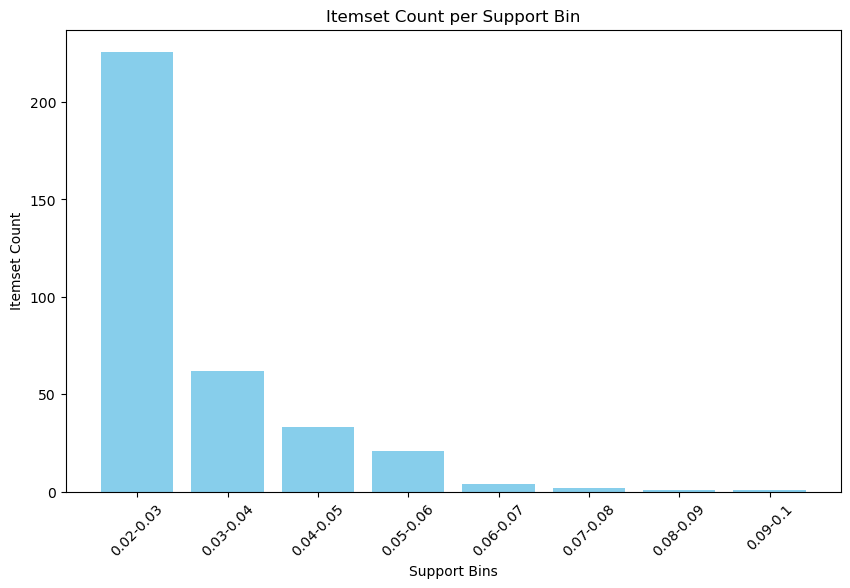

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori

# Assuming 'frequent_itemsets' DataFrame is already generated with a 'support' column

# Define histogram-style bins for the support values
bins = [0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
labels = ['0.02-0.03', '0.03-0.04', '0.04-0.05', '0.05-0.06',
          '0.06-0.07', '0.07-0.08', '0.08-0.09', '0.09-0.1']

# Assign each itemset to a bin based on its support value
frequent_itemsets['Support_Bin'] = pd.cut(frequent_itemsets['support'], bins=bins, labels=labels, right=False)

# Count the number of itemsets in each bin
support_bin_counts = frequent_itemsets['Support_Bin'].value_counts().sort_index()

# Create a DataFrame to display the bin counts
support_bin_summary = pd.DataFrame({
    'Support Bin': support_bin_counts.index,
    'Itemset Count': support_bin_counts.values
})

# Display the DataFrame with bin ranges and item counts
print(support_bin_summary)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(support_bin_summary['Support Bin'], support_bin_summary['Itemset Count'], color='skyblue')
plt.xlabel('Support Bins')
plt.ylabel('Itemset Count')
plt.title('Itemset Count per Support Bin')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from mlxtend.frequent_patterns import association_rules

# Generate association rules with a minimum confidence threshold of 0.1
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

# Sort the rules by lift and display the top 10 rules
top_rules = rules.sort_values(by='lift', ascending=False).head(50)
top_rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
151,(PINK REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",0.037172,0.037269,0.026302,0.707572,18.985589,0.024916,3.292197,0.983902
150,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.037269,0.037172,0.026302,0.705729,18.985589,0.024916,3.271912,0.984001
152,(GREEN REGENCY TEACUP AND SAUCER),"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",0.049255,0.029068,0.026302,0.533990,18.370509,0.024870,2.083501,0.994552
149,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.029068,0.049255,0.026302,0.904841,18.370509,0.024870,9.991161,0.973873
23,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.049255,0.037172,0.030718,0.623645,16.777362,0.028887,2.558300,0.989115
22,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.037172,0.049255,0.030718,0.826371,16.777362,0.028887,5.475719,0.976702
148,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.030718,0.051730,0.026302,0.856240,16.552102,0.024713,6.596208,0.969361
153,(ROSES REGENCY TEACUP AND SAUCER ),"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",0.051730,0.030718,0.026302,0.508443,16.552102,0.024713,1.971861,0.990841
21,(GARDENERS KNEELING PAD KEEP CALM ),(GARDENERS KNEELING PAD CUP OF TEA ),0.044305,0.036784,0.026496,0.598028,16.258012,0.024866,2.396230,0.982000
20,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.036784,0.044305,0.026496,0.720317,16.258012,0.024866,3.417059,0.974331


In [ ]:
from mlxtend.frequent_patterns import association_rules

# Generate association rules with a minimum confidence threshold of 0.02
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.02)

# Filter the rules to include only those with single-item antecedents and single-item consequents
product_level_rules = rules[(rules['antecedents'].apply(lambda x: len(x) == 1)) &
                            (rules['consequents'].apply(lambda x: len(x) == 1))]

# Sort the filtered rules by lift and display the top 50 rules
top_rules = product_level_rules.sort_values(by='lift', ascending=False).head(50)

# Round the values to 2 decimal places
top_rules = top_rules.round(2)

# Display the rounded table
top_rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
23,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.05,0.04,0.03,0.62,16.78,0.03,2.56,0.99
22,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.04,0.05,0.03,0.83,16.78,0.03,5.48,0.98
21,(GARDENERS KNEELING PAD KEEP CALM ),(GARDENERS KNEELING PAD CUP OF TEA ),0.04,0.04,0.03,0.60,16.26,0.02,2.40,0.98
20,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.04,0.04,0.03,0.72,16.26,0.02,3.42,0.97
136,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.04,0.05,0.03,0.78,15.12,0.03,4.35,0.97
137,(ROSES REGENCY TEACUP AND SAUCER ),(PINK REGENCY TEACUP AND SAUCER),0.05,0.04,0.03,0.56,15.12,0.03,2.20,0.98
27,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.05,0.05,0.04,0.72,14.63,0.03,3.40,0.98
26,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.05,0.05,0.04,0.76,14.63,0.03,3.90,0.98
17,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX ),0.04,0.04,0.03,0.63,14.49,0.02,2.61,0.97
16,(SPACEBOY LUNCH BOX ),(DOLLY GIRL LUNCH BOX),0.04,0.04,0.03,0.60,14.49,0.02,2.38,0.97


In [ ]:
# Filter rules based on lift (e.g., only keep rules with lift > 2)
high_lift_rules = rules[rules['lift'] > 2]

# Display the filtered rules
print(high_lift_rules.head(10))


                         antecedents                        consequents  \
0      (60 TEATIME FAIRY CAKE CASES)  (PACK OF 72 RETROSPOT CAKE CASES)   
1  (PACK OF 72 RETROSPOT CAKE CASES)      (60 TEATIME FAIRY CAKE CASES)   
2        (ALARM CLOCK BAKELIKE PINK)       (ALARM CLOCK BAKELIKE GREEN)   
3       (ALARM CLOCK BAKELIKE GREEN)        (ALARM CLOCK BAKELIKE PINK)   
4       (ALARM CLOCK BAKELIKE GREEN)        (ALARM CLOCK BAKELIKE RED )   
5        (ALARM CLOCK BAKELIKE RED )       (ALARM CLOCK BAKELIKE GREEN)   
6        (ALARM CLOCK BAKELIKE PINK)        (ALARM CLOCK BAKELIKE RED )   
7        (ALARM CLOCK BAKELIKE RED )        (ALARM CLOCK BAKELIKE PINK)   
8      (CHARLOTTE BAG PINK POLKADOT)      (RED RETROSPOT CHARLOTTE BAG)   
9      (RED RETROSPOT CHARLOTTE BAG)      (CHARLOTTE BAG PINK POLKADOT)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.040181            0.064056  0.021983    0.547101   8.541000   
1            0.064

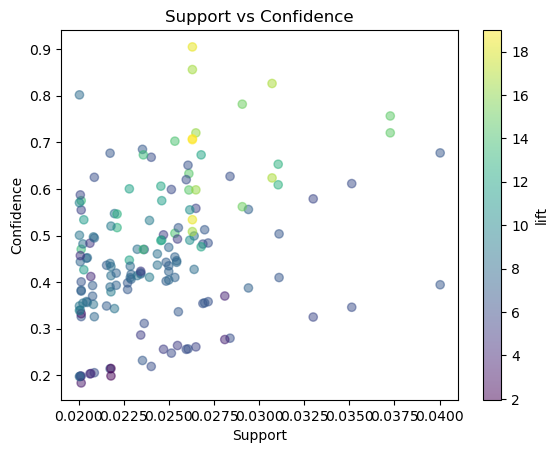

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for support vs confidence
plt.scatter(rules['support'], rules['confidence'], alpha=0.5, c=rules['lift'], cmap='viridis')
plt.colorbar(label='lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()


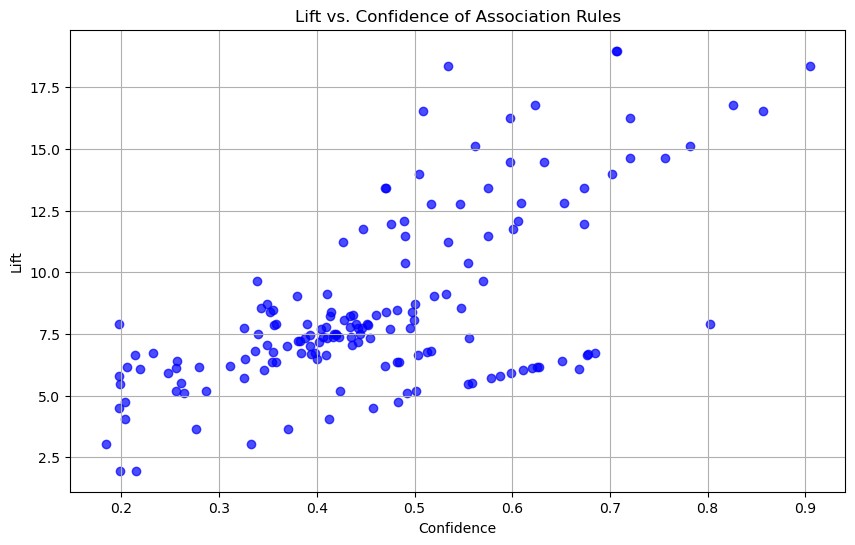

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(rules['confidence'], rules['lift'], alpha=0.7, color='blue')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Lift vs. Confidence of Association Rules')
plt.grid(True)
plt.show()


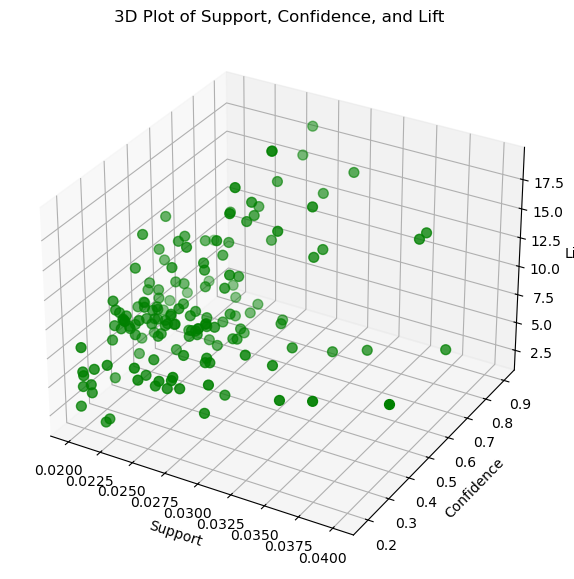

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rules['support'], rules['confidence'], rules['lift'], c='green', s=50)
ax.set_xlabel('Support')
ax.set_ylabel('Confidence')
ax.set_zlabel('Lift')
plt.title('3D Plot of Support, Confidence, and Lift')
plt.show()


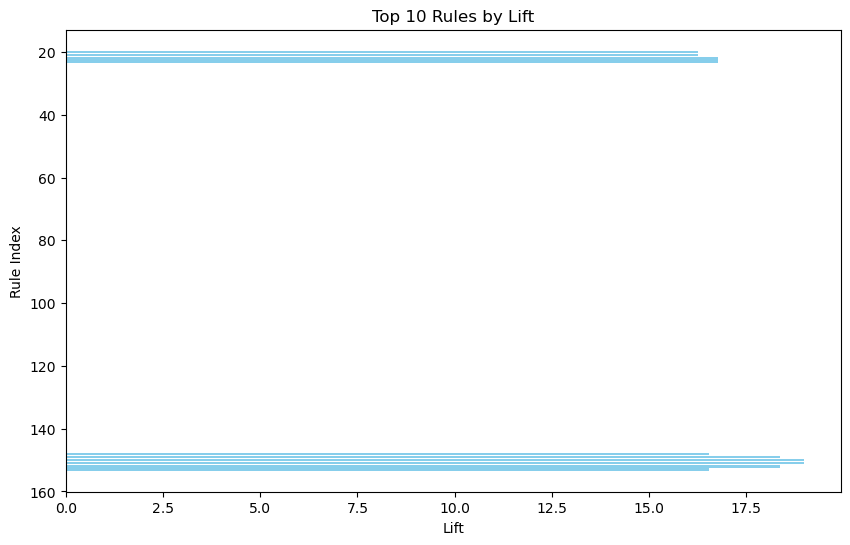

In [ ]:
top_rules_lift = rules.sort_values(by='lift', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_rules_lift.index, top_rules_lift['lift'], color='skyblue')
plt.xlabel('Lift')
plt.ylabel('Rule Index')
plt.title('Top 10 Rules by Lift')
plt.gca().invert_yaxis()
plt.show()


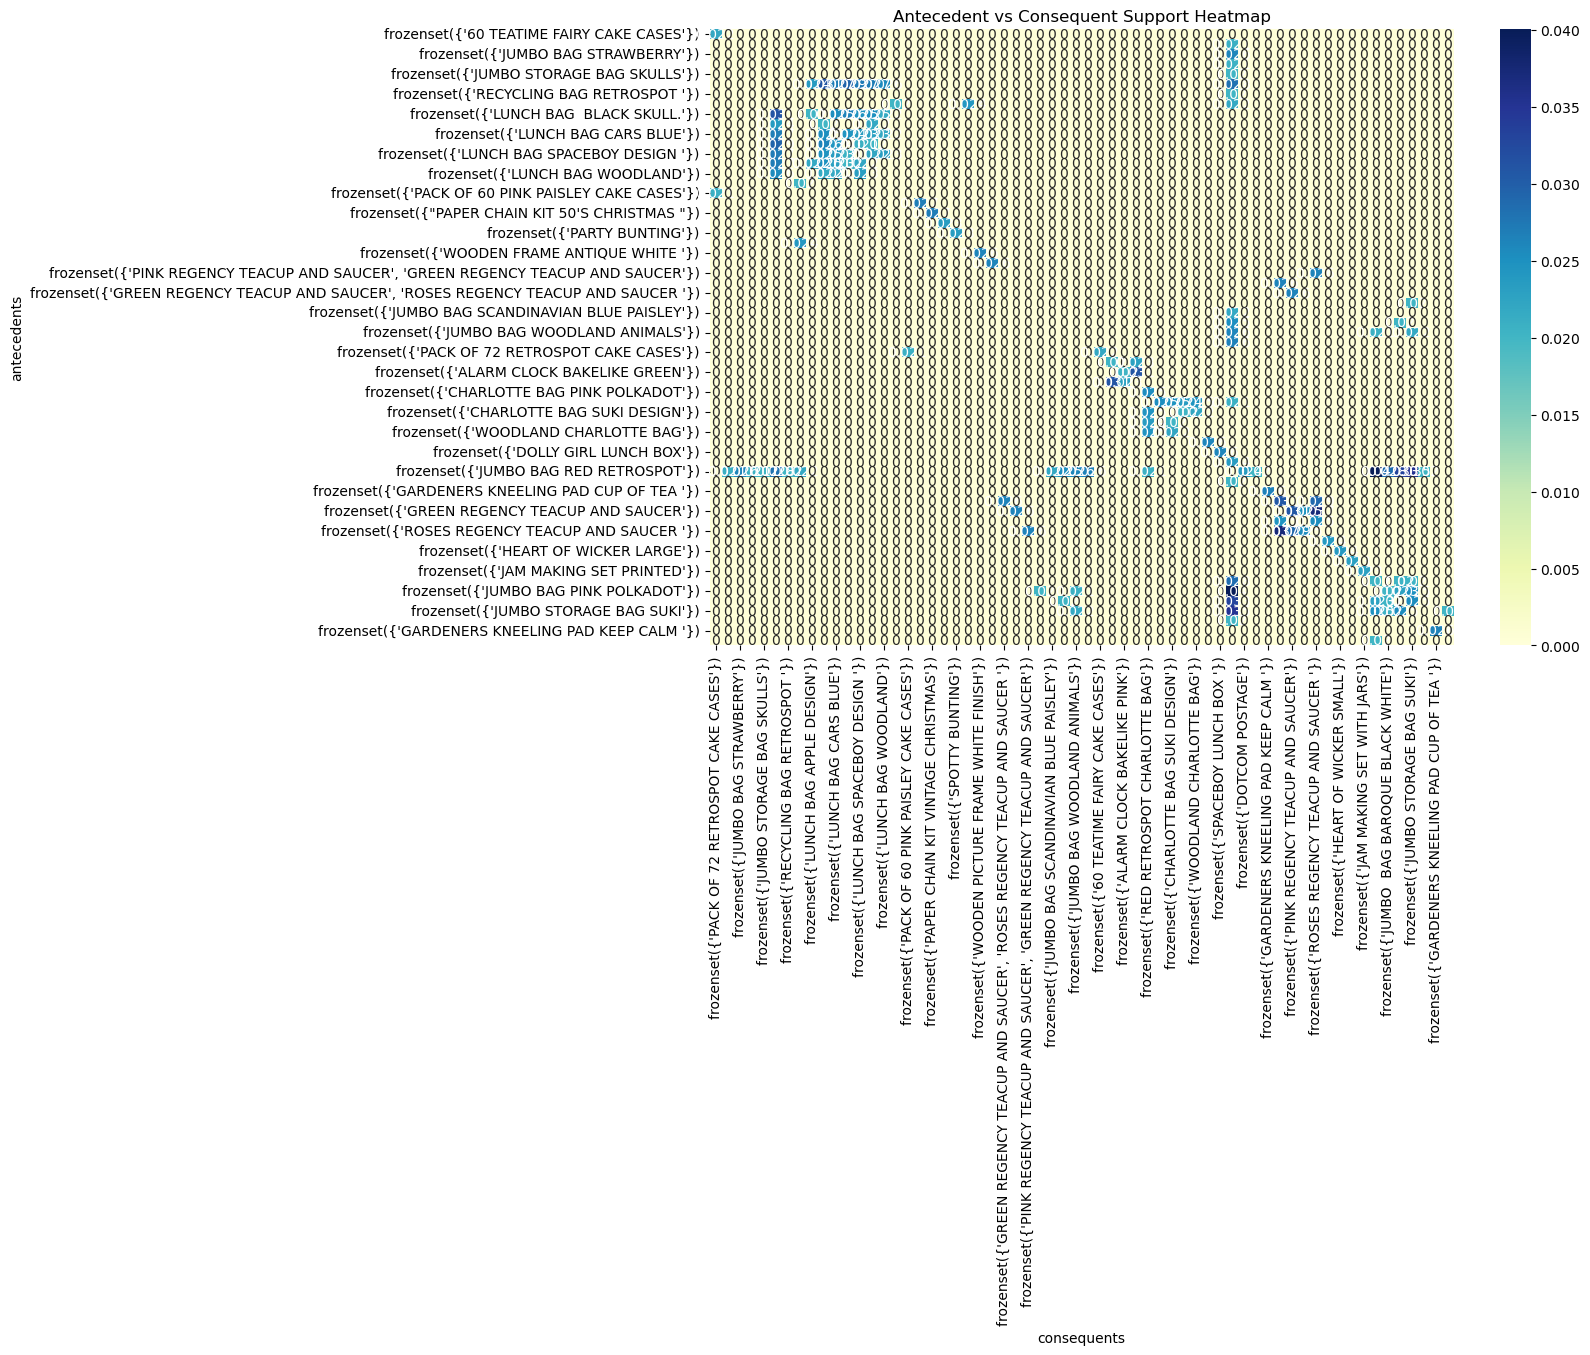

In [ ]:
import seaborn as sns
heatmap_data = rules.pivot_table(index='antecedents', columns='consequents', values='support', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", cbar=True)
plt.title('Antecedent vs Consequent Support Heatmap')
plt.show()


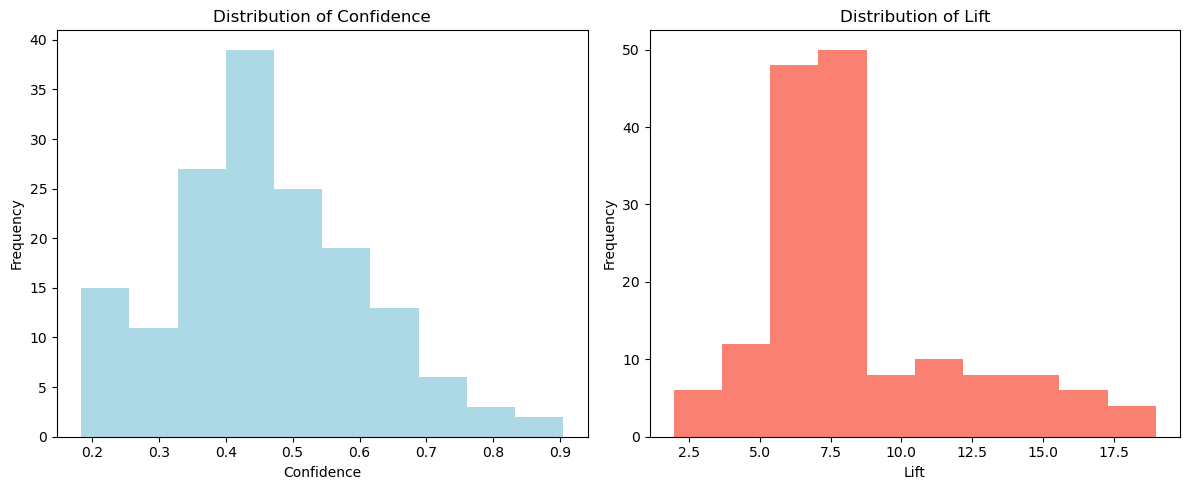

In [ ]:
plt.figure(figsize=(12, 5))

# Confidence distribution
plt.subplot(1, 2, 1)
plt.hist(rules['confidence'], bins=10, color='lightblue')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.title('Distribution of Confidence')

# Lift distribution
plt.subplot(1, 2, 2)
plt.hist(rules['lift'], bins=10, color='salmon')
plt.xlabel('Lift')
plt.ylabel('Frequency')
plt.title('Distribution of Lift')

plt.tight_layout()
plt.show()


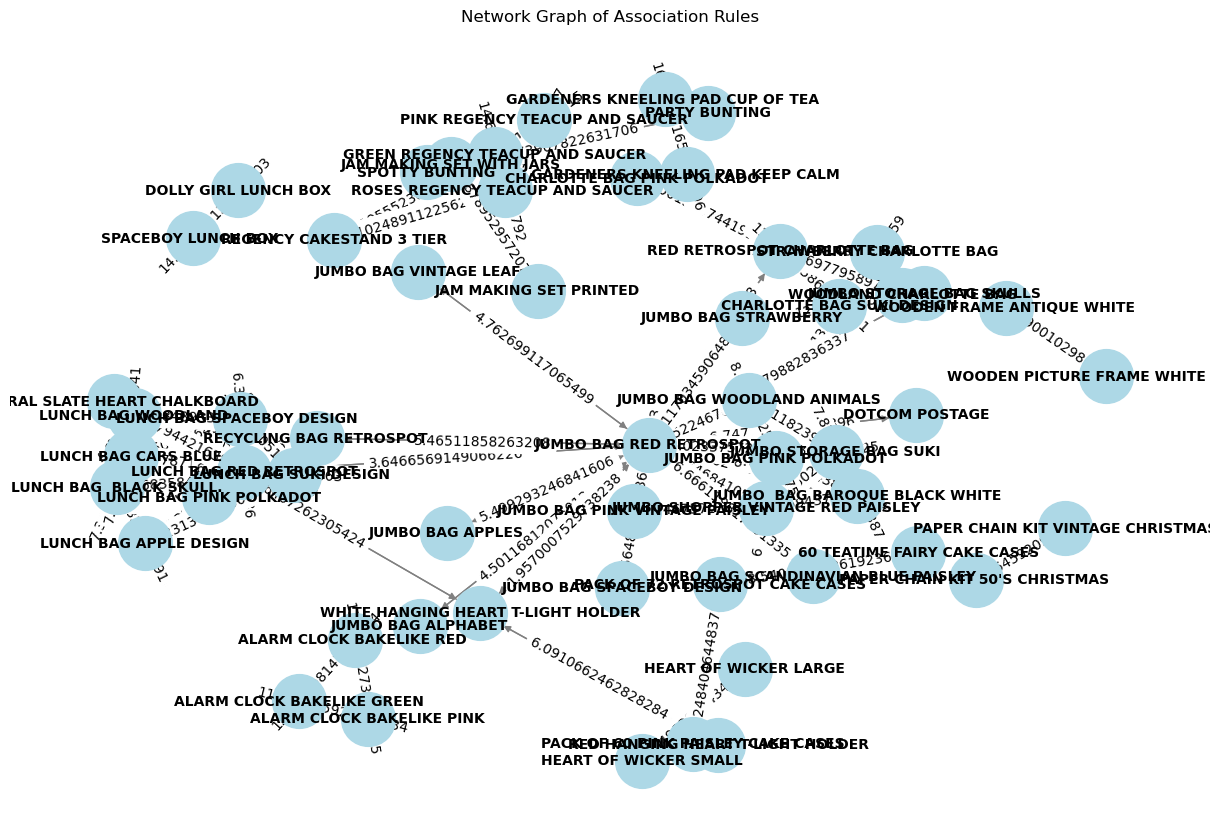

In [ ]:
import networkx as nx

G = nx.DiGraph()
for _, row in rules.iterrows():
    antecedent = next(iter(row['antecedents']))
    consequent = next(iter(row['consequents']))
    G.add_edge(antecedent, consequent, weight=row['lift'])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=1)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1500, font_size=10, font_weight='bold', arrows=True)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Network Graph of Association Rules')
plt.show()


In [ ]:
import networkx as nx
import re

# Assuming 'rules' is your DataFrame containing the association rules

# Filter rules with lift > 2.14
filtered_rules = rules[rules['lift'] > 2.14]

# Create a directed graph from the filtered rules
G = nx.DiGraph()

# Function to clean item names by stripping spaces and removing special characters
def clean_name(name):
    name = name.strip()                          # Remove leading and trailing spaces
    name = re.sub(r'[^\x00-\x7F]+', '', name)    # Remove non-ASCII characters
    name = re.sub(r'[^A-Za-z0-9\s]', '', name)   # Remove special characters except spaces
    return name

for _, row in filtered_rules.iterrows():
    # Convert antecedents and consequents to lists and clean them
    antecedents = [clean_name(item) for item in row['antecedents']]
    consequents = [clean_name(item) for item in row['consequents']]

    # Add nodes to the graph with explicit labels
    for antecedent in antecedents:
        G.add_node(antecedent, label=antecedent)  # Add antecedent with label
    for consequent in consequents:
        G.add_node(consequent, label=consequent)  # Add consequent with label

    # Add edges between antecedents and consequents
    for antecedent in antecedents:
        for consequent in consequents:
            G.add_edge(antecedent, consequent, weight=row['lift'], confidence=row['confidence'])

# Write the graph to a .gexf file for Gephi
nx.write_gexf(G, 'association_rules_graph.gexf')

print("Graph has been written to 'association_rules_graph.gexf'")


Graph has been written to 'association_rules_graph.gexf'


In [ ]:
import pandas as pd
from collections import Counter
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset (replace with your actual file path)
df = pd.read_csv('Copy of Online Retail.csv')

# Remove rows with missing values in 'InvoiceNo' or 'Description'
df = df.dropna(subset=['InvoiceNo', 'Description'])

# Remove cancelled transactions (those with InvoiceNo starting with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# List of product type keywords
product_keywords = [
    "accessory", "alarm", "album", "alligator", "apron", "artichoke",
    "asparagus", "astringent", "backpack", "baking", "balloon",
    "bandana", "basket", "beach", "bean", "beanie", "bed", "bedspread", "belt",
    "bicycle", "bikini", "bin", "blender", "block", "book", "booklet", "boot",
    "bottle", "bowl", "bracelet", "bread", "brush", "cabinet", "cake",
    "calendar", "candle", "candlestick", "carpet", "case", "casserole",
    "cat", "chair", "cheese", "cheesecake", "clock", "clothing", "coat",
    "comb", "computer", "conditioner", "cooker", "cookie", "costume", "cream",
    "cup", "cushion", "cutlery", "decoration", "deodorant", "desk", "dessert",
    "doormat", "drawer", "earmuff", "earrings", "envelope", "event", "flower",
    "fork", "frame", "furniture", "game", "garland", "gift", "gift wrap",
    "glass", "glove", "grater", "grill", "hairdryer", "handbag", "hat",
    "headband", "hook", "hosiery", "jacket", "jar", "jewelry", "kettle",
    "keychain", "knife", "label", "ladle", "lamp", "lantern", "lotion",
    "luggage", "makeup", "mask", "mat", "microwave", "mirror", "mixer",
    "muffin", "notebook", "oven", "pad", "paint", "paper", "party", "pen",
    "pencil", "perfume", "pet", "plate", "plush", "pocket", "puzzle",
    "rack", "rug", "scarf", "scrub", "shirt", "shoes", "shopping", "socks",
    "spatula", "spoon", "sticker", "suitcase", "sweater", "sweeping", "table",
    "tape", "teapot", "tissue", "tote", "toys", "tray", "umbrella",
    "vase", "wallet", "watch", "wreath", "yarn", "zebra", "zest"
]

#words removed
#bag,box, pot, car ,ball


# Function to get the product type or last two words from the description
def get_product_type_or_last_word(description):
    if isinstance(description, str):
        # Convert the description to lowercase
        description_lower = description.lower()

        # Check for product keywords in the description
        for keyword in product_keywords:
            if keyword in description_lower:  # Compare with lowercase keyword
                return keyword  # Return the first matching keyword
        # If no keywords found, return the last two words
        words = description_lower.split()
        return ' '.join(words[-2:]) if len(words) >= 2 else description_lower
    return ''  # Return empty string for non-string values


# Add a new column with the last word of the description
df['Last_Word'] = df['Description'].apply(get_product_type_or_last_word)

# Group transactions by InvoiceNo and aggregate items into lists
baskets = df.groupby('InvoiceNo')['Last_Word'].apply(list).values.tolist()

# Use TransactionEncoder to one-hot encode the baskets
te = TransactionEncoder()
te_ary = te.fit(baskets).transform(baskets)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Display the first few rows of the encoded data
df_encoded.head()



/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/executing/executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/executing/executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
/opt/anaconda3/envs/myenv/lib/python3.12/ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/executing/executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
/opt/anaconda3/envs/myenv/lib/python3.12/ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Const

FileNotFoundError: [Errno 2] No such file or directory: 'Copy of Online Retail.csv'

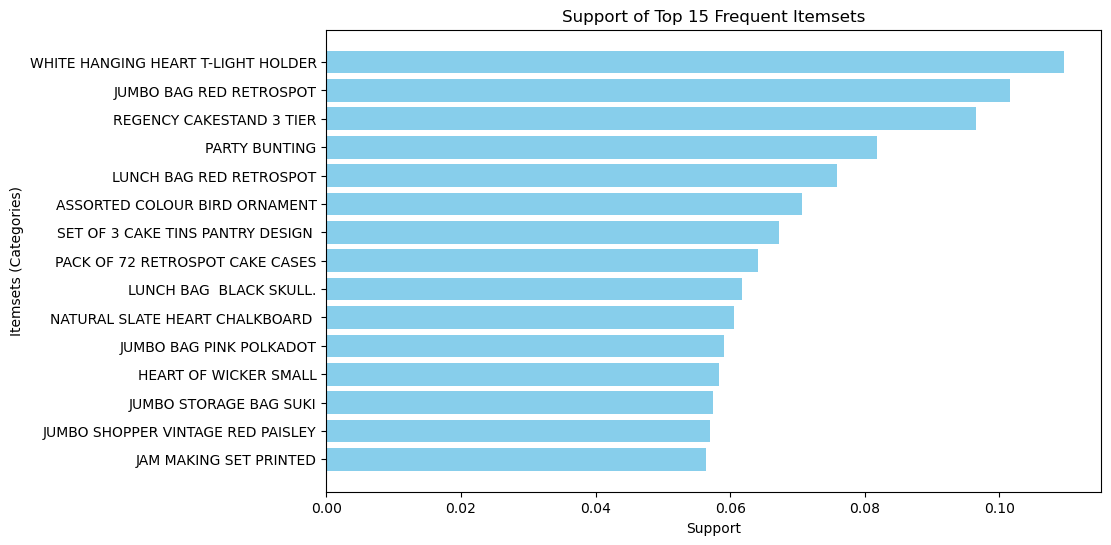

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'frequent_itemsets' is already defined and contains the columns 'support' and 'itemsets'

# Sort the DataFrame to ensure that the top 15 items are plotted in descending order of support
top_frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False).head(15)

# Convert frozenset to a readable string by joining the items
top_frequent_itemsets['itemsets'] = top_frequent_itemsets['itemsets'].apply(lambda x: ', '.join(list(x)))

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_frequent_itemsets['itemsets'], top_frequent_itemsets['support'], color='skyblue')
plt.xlabel('Support')
plt.ylabel('Itemsets (Categories)')
plt.title('Support of Top 15 Frequent Itemsets')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest support at the top
plt.show()


In [ ]:
from mlxtend.frequent_patterns import association_rules

# Generate the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Filter rules based on lift (e.g., only keep rules with lift > 1)
high_lift_rules = rules[rules['lift'] <3]

# Sort antecedents and consequents to avoid duplicate pairs
# Convert frozenset to tuple, sort, and drop duplicate combinations
high_lift_rules['pair'] = high_lift_rules.apply(lambda x: tuple(sorted((list(x['antecedents'])[0], list(x['consequents'])[0]))), axis=1)
high_lift_rules = high_lift_rules.drop_duplicates(subset='pair').drop(columns='pair')

# Round off values to two decimal places
high_lift_rules = high_lift_rules.round(2)

# Select specific columns and display the top 50 rules sorted by lift in descending order
filtered_rules = high_lift_rules[['antecedents', 'consequents', 'antecedent support', 'consequent support',
                                  'support', 'confidence', 'lift', 'leverage', 'conviction', 'zhangs_metric']]
filtered_rules = filtered_rules.sort_values(by='lift', ascending=False).head(50)

filtered_rules.head(50)


/var/folders/22/q2j3xwyd63q79r8qlb0118_h0000gn/T/ipykernel_87118/1573819596.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_lift_rules['pair'] = high_lift_rules.apply(lambda x: tuple(sorted((list(x['antecedents'])[0], list(x['consequents'])[0]))), axis=1)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
78,(WHITE HANGING HEART T-LIGHT HOLDER),(JUMBO BAG RED RETROSPOT),0.11,0.1,0.02,0.2,1.96,0.01,1.12,0.55


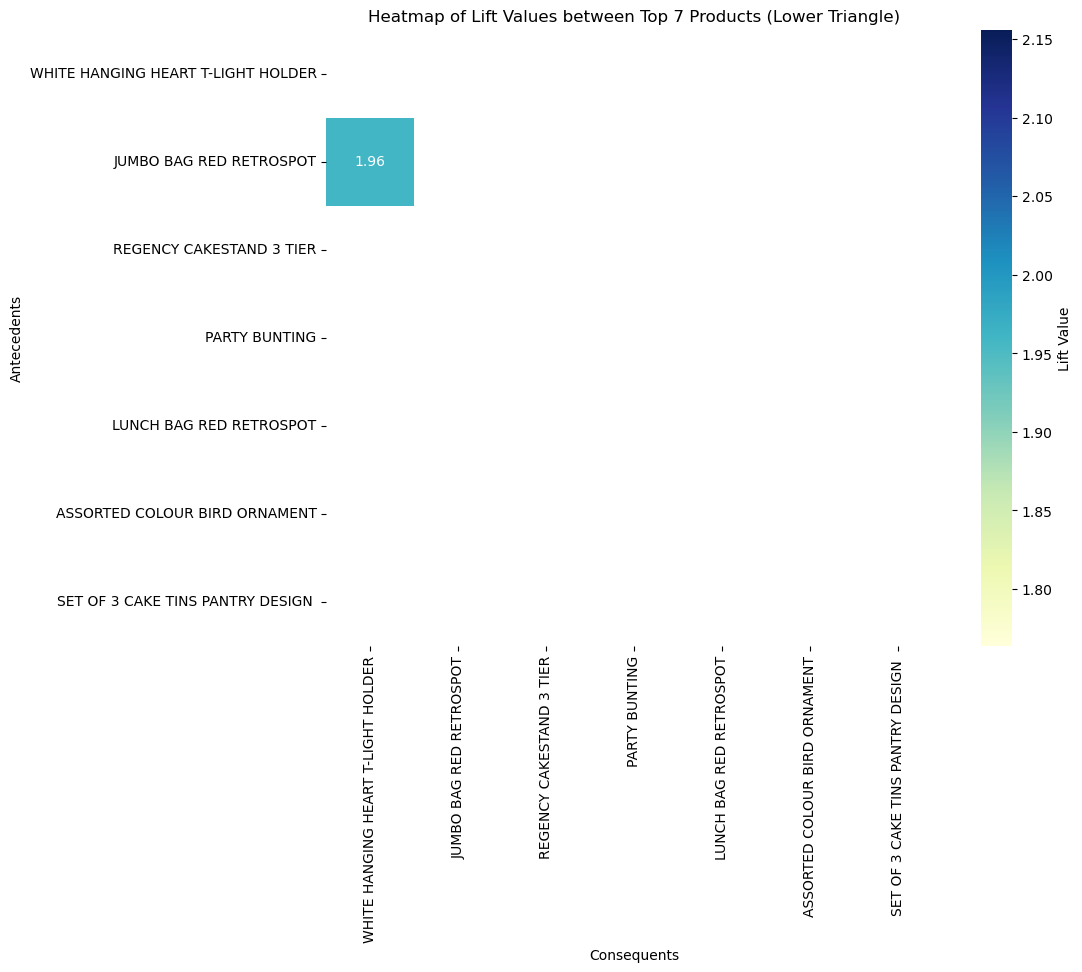

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import association_rules

# Generate the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Filter rules based on lift (only keep rules with 1 < lift < 3)
high_lift_rules = rules[(rules['lift'] > 1) & (rules['lift'] < 3)]

# Round off values to two decimal places
high_lift_rules = high_lift_rules.round(2)

# Convert frozenset to string for both antecedents and consequents
high_lift_rules['antecedents'] = high_lift_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
high_lift_rules['consequents'] = high_lift_rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Select the top 7 products based on support in descending order
top_products = frequent_itemsets.sort_values(by='support', ascending=False).head(7)['itemsets']
top_products = top_products.apply(lambda x: ', '.join(list(x)))

# Filter the rules to keep only those with antecedents and consequents in the top 7 products
top_high_lift_rules = high_lift_rules[
    high_lift_rules['antecedents'].isin(top_products) &
    high_lift_rules['consequents'].isin(top_products) &
    (high_lift_rules['antecedents'] != high_lift_rules['consequents'])  # Exclude diagonal (self-pairing)
]

# Create a pivot table with antecedents as rows, consequents as columns, and lift as values
lift_matrix = top_high_lift_rules.pivot(index='antecedents', columns='consequents', values='lift')

# Reindex to ensure both axes have the same 7 products in the specified order
lift_matrix = lift_matrix.reindex(index=top_products, columns=top_products)

# Mask the upper triangle to display values only on one side of the diagonal
mask = np.triu(np.ones_like(lift_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(lift_matrix, mask=mask, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Lift Value'}, square=True)
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.title('Heatmap of Lift Values between Top 7 Products (Lower Triangle)')
plt.show()


In [ ]:
import networkx as nx

# Filter rules with lift > 1.87
filtered_rules = rules[rules['lift'] > 1]

# Further filter to keep only pairwise rules (single-item antecedents and consequents)
pairwise_rules = filtered_rules[
    filtered_rules['antecedents'].apply(lambda x: len(x) == 1) &
    filtered_rules['consequents'].apply(lambda x: len(x) == 1)
]

# Initialize a directed graph
G = nx.DiGraph()

# Iterate through each rule in the filtered DataFrame
for _, rule in pairwise_rules.iterrows():
    # Extract the single item from the frozenset as a string
    antecedent = list(rule['antecedents'])[0]  # Convert frozenset to list and get the first item
    consequent = list(rule['consequents'])[0]  # Convert frozenset to list and get the first item

    # Add an edge with attributes for confidence, lift, and support
    G.add_edge(antecedent, consequent, confidence=rule['confidence'], lift=rule['lift'], support=rule['support'])

# Display the graph information
print(f"Graph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

# Save the graph to a .gexf file for Gephi
nx.write_gexf(G, 'filtered_rules.gexf')
print("Graph has been written to 'filtered_rules.gexf'")

# Save the graph to a .graphml file for Gephi or other tools
nx.write_graphml(G, 'filtered_rules.graphml')
print("Graph has been written to 'filtered_rules.graphml'")


Graph created with 56 nodes and 148 edges.
Graph has been written to 'filtered_rules.gexf'
Graph has been written to 'filtered_rules.graphml'


In [ ]:
from mlxtend.frequent_patterns import association_rules

# Generate the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Filter rules based on lift and ensure at least two items in either antecedent or consequent
high_lift_rules = rules[
    (rules['lift'] > 1) &
    (rules['antecedents'].apply(lambda x: len(x) > 1) | rules['consequents'].apply(lambda x: len(x) > 1))
]

# Create a new column with sorted antecedents and consequents to manage unique combinations
high_lift_rules['pair'] = high_lift_rules.apply(
    lambda row: tuple(sorted(row['antecedents'].union(row['consequents']))), axis=1
)

# Drop duplicates based on the pair column, keeping the first occurrence
unique_rules = high_lift_rules.drop_duplicates(subset='pair')

# Display the filtered rules
unique_rules_sorted = unique_rules.sort_values(by='lift', ascending=False)

# Show the results
unique_rules_sorted.head(20)


/var/folders/22/q2j3xwyd63q79r8qlb0118_h0000gn/T/ipykernel_87118/2889546058.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_lift_rules['pair'] = high_lift_rules.apply(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,pair
148,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.030718,0.051730,0.026302,0.856240,16.552102,0.024713,6.596208,0.969361,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY..."
154,"(JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROS...",(JUMBO STORAGE BAG SUKI),0.040035,0.057456,0.020042,0.500606,8.712829,0.017741,1.887375,0.922145,"(JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROS..."


In [ ]:
from mlxtend.frequent_patterns import association_rules

# Generate the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Filter rules based on lift and ensure at least two items in either antecedent or consequent
high_lift_rules = rules[
    (rules['lift'] > 1) &
    (rules['antecedents'].apply(lambda x: len(x) > 1) | rules['consequents'].apply(lambda x: len(x) > 1))
]

# Create a new column with sorted antecedents and consequents to manage unique combinations
high_lift_rules['pair'] = high_lift_rules.apply(
    lambda row: tuple(sorted(row['antecedents'].union(row['consequents']))), axis=1
)

# Drop duplicates based on the pair column, keeping the first occurrence
unique_rules = high_lift_rules.drop_duplicates(subset='pair').drop(columns='pair')

# Round off values to two decimal places
unique_rules = unique_rules.round(2)

# Sort and display the filtered rules
unique_rules_sorted = unique_rules.sort_values(by='lift', ascending=False)
unique_rules_sorted.head(20)


/var/folders/22/q2j3xwyd63q79r8qlb0118_h0000gn/T/ipykernel_87118/2984413542.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_lift_rules['pair'] = high_lift_rules.apply(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
148,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.03,0.05,0.03,0.86,16.55,0.02,6.60,0.97
154,"(JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROS...",(JUMBO STORAGE BAG SUKI),0.04,0.06,0.02,0.50,8.71,0.02,1.89,0.92


In [ ]:
from mlxtend.frequent_patterns import association_rules

# Generate association rules with a minimum confidence threshold to focus on strong relationships
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

# Filter for high-confidence and high-lift rules, indicating strong cross-selling opportunities
cross_sell_rules = rules[(rules['lift'] > 1.5) & (rules['confidence'] > 0.3)]

# Sort rules by lift in descending order to prioritize strong associations
cross_sell_rules = cross_sell_rules.sort_values(by='lift', ascending=False)

# Round off values to two decimal places
cross_sell_rules = cross_sell_rules.round(2)

# Select relevant columns for display
cross_sell_rules = cross_sell_rules[['antecedents', 'consequents', 'antecedent support',
                                     'consequent support', 'support', 'confidence', 'lift']]

# Display top cross-selling rules
cross_sell_rules.head(20)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
150,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.04,0.04,0.03,0.71,18.99
151,(PINK REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",0.04,0.04,0.03,0.71,18.99
149,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.03,0.05,0.03,0.90,18.37
152,(GREEN REGENCY TEACUP AND SAUCER),"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",0.05,0.03,0.03,0.53,18.37
23,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.05,0.04,0.03,0.62,16.78
22,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.04,0.05,0.03,0.83,16.78
148,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.03,0.05,0.03,0.86,16.55
153,(ROSES REGENCY TEACUP AND SAUCER ),"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",0.05,0.03,0.03,0.51,16.55
20,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.04,0.04,0.03,0.72,16.26
21,(GARDENERS KNEELING PAD KEEP CALM ),(GARDENERS KNEELING PAD CUP OF TEA ),0.04,0.04,0.03,0.60,16.26


In [ ]:
import pandas as pd

df = pd.read_csv('/Users/vishwapatel/Desktop/Marketing Analytics MKTG /Final Project/Online Retail Cleaned-Regular.csv')

# Define the function to map each description to its appropriate category
def map_description_to_category(description):
    category_keywords = {
    "Water Bottle": ["hot water bottle", "bottle", "water bottle"],
    "Decoration": ["lantern", "heart", "t-light holder", "ornament", "hanging", "decoration", "garland"],
    "Clothing": ["coat", "apron", "dress", "shirt", "jacket", "pants", "scarf", "sweater", "skirt", "hat", "gloves", "socks", "underwear", "t-shirt"],
    "Baking": ["cake", "baking", "cupcake", "cookie", "biscuit", "muffin", "brownie", "bakery"],
    "Storage": ["box", "basket", "cabinet", "drawer", "container", "organizer", "storage", "bin"],
    "Tools": ["tool", "kit", "set", "screwdriver", "wrench", "hammer", "pliers", "measuring tape", "level"],
    "Furniture": ["chair", "table", "shelf", "couch", "sofa", "bed", "desk", "cabinet", "dresser", "stool"],
    "Toys": ["toy", "soft toy", "doll", "game", "puzzle", "action figure", "lego", "board game"],
    "Kitchen": ["pan", "pot", "cutlery", "mug", "spoon", "fork", "knife", "whisk", "peeler", "ladle", "spatula", "sieve", "colander"],
    "Garden": ["plant", "watering can", "planter", "garden", "flower pot", "shovel", "rake", "hose", "gardening gloves"],
    "Office": ["pen", "notebook", "paperweight", "desk organizer", "stapler", "scissors", "folder", "binder", "highlighter"],
    "Bathroom": ["towel", "soap", "shampoo", "toothbrush", "bathmat", "loofah", "conditioner", "body wash", "scrub"],
    "Electronics": ["phone", "tablet", "charger", "battery", "cable", "headphones", "earbuds", "speaker", "monitor", "keyboard", "mouse"],
    "Beauty": ["lotion", "cream", "perfume", "makeup", "brush", "lipstick", "mascara", "foundation", "eyeliner"],
    "Pet Supplies": ["pet", "dog", "cat", "food", "toy", "leash", "collar", "pet bed", "fish tank"],
    "Sports": ["ball", "bat", "glove", "exercise", "fitness", "dumbbell", "weights", "treadmill", "yoga mat", "resistance band"],
    "Office Supplies": ["paper", "envelope", "folder", "notepad", "sticky notes", "paper clips", "stapler", "tape"],
    "Gift": ["gift", "wrap", "card", "present", "ribbon", "bow", "gift bag"],
    "Art Supplies": ["paint", "brush", "canvas", "sketchbook", "easel", "marker", "colored pencils", "crayons"],
    "Beverages": ["coffee", "tea", "juice", "soda", "water", "milk", "wine", "beer", "champagne"],
    "Seasonal": ["holiday", "Christmas", "Easter", "Halloween", "Valentine", "New Year"],
    "Accessories": ["bag", "wallet", "belt", "jewelry", "watch", "scarf", "tie", "sunglasses"],
    "Camping": ["tent", "sleeping bag", "flashlight", "backpack", "camp stove", "cooler", "lantern"],
    "Jewelry": ["ring", "bracelet", "necklace", "earrings", "watch", "pendant"],
    "Shoes": ["sneakers", "boots", "sandals", "heels", "flats", "loafers", "slippers"],
    "Cleaning Supplies": ["detergent", "sponge", "mop", "broom", "brush", "cleaner", "bleach"],
    "Automotive": ["car", "bike", "motorcycle", "tire", "helmet", "engine", "battery"],
    "Lighting": ["lamp", "light", "bulb", "torch", "flashlight", "candle", "lantern"],
    "Books": ["book", "novel", "magazine", "comic", "textbook", "encyclopedia"],
    "Baby Products": ["diaper", "bottle", "pacifier", "stroller", "crib", "baby wipes", "onesie"],
    "Music Instruments": ["guitar", "piano", "keyboard", "drum", "violin", "flute"],
    "Health Products": ["vitamins", "medicine", "supplement", "bandage", "thermometer", "pill"],
    "Travel Accessories": ["luggage", "passport holder", "travel pillow", "backpack", "duffel bag"],
    "Craft Supplies": ["yarn", "thread", "needle", "fabric", "sewing kit", "scissors", "knitting"],
    "Party Supplies": ["balloon", "streamer", "party hat", "confetti", "banner", "napkins", "plates"],
    "Educational": ["puzzle", "flash cards", "workbook", "learning kit", "poster", "activity book"],
    "Outdoor": ["tent", "camping chair", "sleeping bag", "hiking boots", "lantern"],
    "Photography": ["camera", "tripod", "lens", "filter", "photobook", "album"],
    "Gaming": ["controller", "console", "video game", "VR headset", "gaming chair"],
    "Stationery": ["pen", "pencil", "eraser", "sharpener", "ruler", "compass", "protractor"],
    "Apparel": ["jeans", "blouse", "jacket", "dress", "leggings", "pajamas", "coat"],
    "Household Essentials": ["trash bags", "paper towels", "napkins", "toilet paper", "sponges", "foil"],
    "Safety Equipment": ["first aid kit", "gloves", "helmet", "goggles", "face mask"],
}

    # Check for keywords in the description
    for category, keywords in category_keywords.items():
        for keyword in keywords:
            if isinstance(description, str) and keyword in description.lower():
                return category  # Return the category if a keyword matches
    return "Other"  # Return "Other" if no category matches

# Apply the category mapping function to each description
df['Category'] = df['Description'].apply(map_description_to_category)


    # Check for keywords in the description
    for category, keywords in category_keywords.items():
        for keyword in keywords:
            if isinstance(description, str) and keyword in description.lower():
                return category  # Return the category if a keyword matches
    return "Other"  # Return "Other" if no category matches
# Apply the category mapping function to each description
df['Category'] = df['Description'].apply(map_description_to_category)

In [ ]:

# Generate frequent itemsets with a minimum support of 0.01 (1% of transactions)
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)

# Display the frequent itemsets
#print(frequent_itemsets.sort_values(by='support', ascending=False).head(50))

df['

     support                              itemsets
29  0.109671  (WHITE HANGING HEART T-LIGHT HOLDER)
6   0.101519             (JUMBO BAG RED RETROSPOT)
23  0.096521            (REGENCY CAKESTAND 3 TIER)
19  0.081817                       (PARTY BUNTING)
13  0.075897             (LUNCH BAG RED RETROSPOT)
1   0.070607       (ASSORTED COLOUR BIRD ORNAMENT)
25  0.067210   (SET OF 3 CAKE TINS PANTRY DESIGN )
17  0.064056     (PACK OF 72 RETROSPOT CAKE CASES)
9   0.061775             (LUNCH BAG  BLACK SKULL.)
16  0.060610     (NATURAL SLATE HEART CHALKBOARD )
5   0.059106             (JUMBO BAG PINK POLKADOT)
2   0.058281               (HEART OF WICKER SMALL)
8   0.057456              (JUMBO STORAGE BAG SUKI)
7   0.057019   (JUMBO SHOPPER VINTAGE RED PAISLEY)
3   0.056389              (JAM MAKING SET PRINTED)
18  0.056292     (PAPER CHAIN KIT 50'S CHRISTMAS )
14  0.056146          (LUNCH BAG SPACEBOY DESIGN )
11  0.055806                 (LUNCH BAG CARS BLUE)
27  0.055370                   